# Hamoye Capstone project - Summer Olympics

## By Sumit Redekar

### 1. Problem Statement
To predict the type of medal a Country wins (GOLD, BRONZE, SILVER). So the target variable is MEDAL.

### 2. Dataset 
Dataset taken from **Kaggle** - https://www.kaggle.com/the-guardian/olympic-games

### 3. Evaluation
Metrics used to evaluate the model performance are: accuracy, precision and f1 score.

### Getting Started


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('summer.csv')

In [4]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


### Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [6]:
data.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


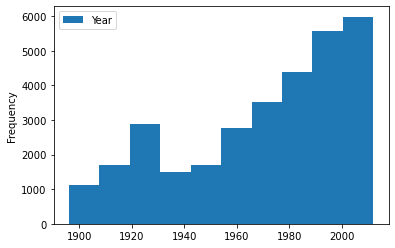

In [7]:
data.plot(kind='hist');

#### Missing Values

In [8]:
data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

Our data does not contain any large number of missing values so for this we will simply drop the missing values

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31161 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31161 non-null  int64 
 1   City        31161 non-null  object
 2   Sport       31161 non-null  object
 3   Discipline  31161 non-null  object
 4   Athlete     31161 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31161 non-null  object
 7   Event       31161 non-null  object
 8   Medal       31161 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


#### Converting categorical features into numeric features with Ordinal Encoding

In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [13]:
#copy of og data
data_tmp = data.copy()

In [14]:
data.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [15]:
categorical_features = ['City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender','Event', 'Medal']
ordinal = OrdinalEncoder()
data_tmp[categorical_features] = ordinal.fit_transform(data[categorical_features])

In [16]:
data_tmp

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,2.0,0.0,49.0,7409.0,58.0,0.0,78.0,1.0
1,1896,2.0,0.0,49.0,8014.0,7.0,0.0,78.0,2.0
2,1896,2.0,0.0,49.0,4883.0,52.0,0.0,79.0,0.0
3,1896,2.0,0.0,49.0,12434.0,52.0,0.0,79.0,1.0
4,1896,2.0,0.0,49.0,3155.0,52.0,0.0,79.0,2.0
...,...,...,...,...,...,...,...,...,...
31160,2012,8.0,42.0,65.0,8908.0,101.0,0.0,658.0,0.0
31161,2012,8.0,42.0,65.0,16612.0,62.0,0.0,659.0,1.0
31162,2012,8.0,42.0,65.0,20258.0,109.0,0.0,659.0,2.0
31163,2012,8.0,42.0,65.0,264.0,5.0,0.0,659.0,0.0


In [17]:
data_tmp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31161 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        31161 non-null  int64  
 1   City        31161 non-null  float64
 2   Sport       31161 non-null  float64
 3   Discipline  31161 non-null  float64
 4   Athlete     31161 non-null  float64
 5   Country     31161 non-null  float64
 6   Gender      31161 non-null  float64
 7   Event       31161 non-null  float64
 8   Medal       31161 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.4 MB


In [18]:
data_tmp.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

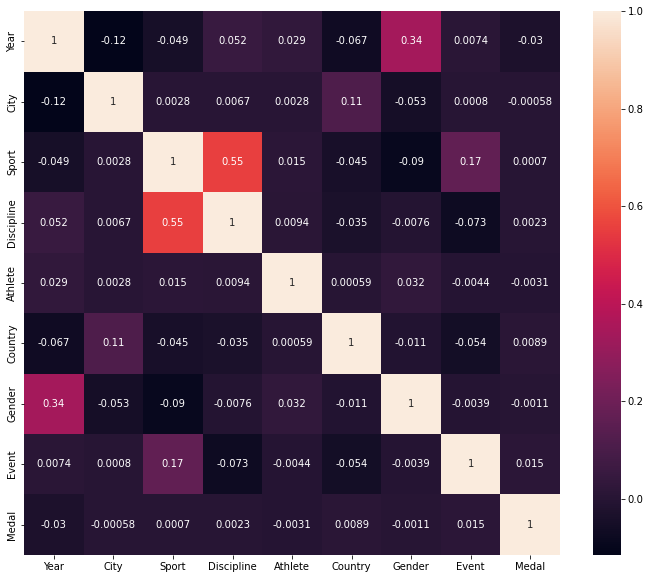

In [19]:
#correlation matrix
corr = data_tmp.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, annot=True);

After converting all categorical features into numerical features our data is now ready for modeling

### Modeling

In [20]:
#getting our X and y
X = data_tmp.drop('Medal',axis=1)
y = data_tmp['Medal']

In [21]:
from  sklearn.model_selection import train_test_split

#splitting X and y in training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, y_train.shape

((24928, 8), (24928,))

In [23]:
X_test.shape, y_test.shape

((6233, 8), (6233,))

In [24]:
#scaling features 
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [25]:
#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [26]:
#importing metrics 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

#### Lazypredict to compare machine learning models

In [27]:
import warnings
warnings.filterwarnings("ignore")

We have large number of samples so we will train our model with 5000 number of samples first.

In [28]:
#import
from lazypredict.Supervised import LazyClassifier

#fitting
clf = LazyClassifier(verbose=0, ignore_warnings=True,custom_metric=None, predictions=True)
models,predictions = clf.fit(X_train_scaled[:5000], X_test_scaled[:5000], y_train[:5000], y_test[:5000])

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:10<00:00,  2.70it/s]


In [29]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.54,0.54,None,0.54,0.50
RandomForestClassifier,0.53,0.53,None,0.53,0.62
BaggingClassifier,0.51,0.51,None,0.51,0.16
DecisionTreeClassifier,0.49,0.49,None,0.49,0.03
XGBClassifier,0.46,0.46,None,0.46,0.40
ExtraTreeClassifier,0.46,0.46,None,0.46,0.02
LGBMClassifier,0.45,0.45,None,0.45,0.23
LabelSpreading,0.45,0.45,None,0.45,1.07
LabelPropagation,0.44,0.45,None,0.44,0.84


These are top five models who performs well :
**BaggingClassifier, DecisionTreeClassifier, RandomForestClassifier, ExtraTreesClassifier, XGBClassifier**  


### Hypertuning

Let's hypertune this models.

#### GridSearchCv for extensive tuning

1. Hyperparameter tuning for **BaggingClassifier**

In [30]:
np.random.seed(42)

#grid
bagging_grid = {
    'n_estimators': [10,20,100,1000],
    'max_samples': [1,2,3],
    'max_features': [1,2,3]
}

#randomizedsearchCv
bagging_rs = GridSearchCV(BaggingClassifier(),bagging_grid,cv=5,verbose=True,n_jobs=-1)

bagging_rs.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   21.8s finished


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3], 'max_samples': [1, 2, 3],
                         'n_estimators': [10, 20, 100, 1000]},
             verbose=True)

In [31]:
bagging_rs.best_params_

{'max_features': 1, 'max_samples': 3, 'n_estimators': 1000}

In [32]:
bagging_rs.score(X_test_scaled,y_test)

0.3494304508262474

2. Hyperparameter tuning for **DecisionTreeClassifier**

In [33]:
np.random.seed(42)

#grid
decision_grid = {
    'max_depth': [None, 1,2,3,4],
    'min_samples_split': [1,2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],

}

#randomizedsearchCv
decision_rs = GridSearchCV(DecisionTreeClassifier(),decision_grid,cv=5,verbose=True,n_jobs=-1)
decision_rs.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4]},
             verbose=True)

In [34]:
decision_rs.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [35]:
decision_rs.score(X_test_scaled,y_test)

0.6292315097064014

3. Hyperparameter tuning for **ExtraTreeClassifier**

In [36]:
np.random.seed(42)

#grid
extra_grid = {
    'max_depth': [None, 1,2,3],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,3],
    'max_features': ['auto', 'sqrt', 'log2'],
}

#randomizedsearchCv
extra_rs = GridSearchCV(ExtraTreeClassifier(),extra_grid,cv=5,verbose=True,n_jobs=-1)
extra_rs.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=ExtraTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3]},
             verbose=True)

In [37]:
extra_rs.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [38]:
extra_rs.score(X_test_scaled, y_test)

0.6354885287983315

4. Hyperparameter tuning for **XGBCLassifier**

In [39]:
np.random.seed(42)

#grid
xgb_grid = {
    'learning_rate':[0.3,1],
    'max_depth': [1,6],
    'min_child_weight': [1,2,3],
    'max_delta_step': [0,1,2]
    
}

#randomizedsearchCv
xgb_rs = GridSearchCV(XGBClassifier(),xgb_grid,cv=5,verbose=True,n_jobs=-1)
xgb_rs.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.3min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [40]:
xgb_rs.best_params_

{'learning_rate': 1,
 'max_delta_step': 1,
 'max_depth': 6,
 'min_child_weight': 1}

In [41]:
xgb_rs.score(X_test_scaled, y_test)

0.6000320872773945

5. Hyperparameter tuning for **RandomForestClassifier**

In [45]:
%time
np.random.seed(42)

#grid
random_grid = {
    'n_estimators': [100,1000],
    'max_depth': [None, 1,2],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,3],
    'max_features': ['auto', 'sqrt', 'log2'],
}

#randomizedsearchCv
random_rs = GridSearchCV(RandomForestClassifier(),random_grid,cv=5,verbose=True,n_jobs=3)
random_rs.fit(X_train_scaled,y_train)

Wall time: 0 ns
Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  7.5min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 13.4min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 16.8min
[Parallel(n_jobs=3)]: Done 810 out of 810 | elapsed: 17.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'max_depth': [None, 1, 2],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 1000]},
             verbose=True)

In [47]:
random_rs.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [48]:
random_rs.score(X_test_scaled, y_test)

0.7052783571313974

After hypertuning our top models,
 - BaggingClassifier - **0.349**
 - DecisionTreeClassifier - **0.629**
 - RandomForestClassifier - **0.635**
 - ExtraTreeClassifier - **0.60**
 - XGBClassifier - **0.70**
 
We can clearly see that our Hypertuned **RandomForestClassifier** performs well compare to other 5 models.

### Evaluating our RandomForestClassifier

In [50]:
#let's fit our model with best parameters
model = RandomForestClassifier(max_depth=None, 
                               max_features='log2',
                               min_samples_leaf=1,
                               min_samples_split=2,
                               n_estimators=1000)


#fitting our model
model.fit(X_train_scaled, y_train)

#evaluating our model
accuracy = model.score(X_test_scaled, y_test)
accuracy

0.706882721001123

In [51]:
#predictions
prediction = model.predict(X_test_scaled) 

In [52]:
#recall
recall = recall_score(y_test, prediction, average='micro')
recall

0.706882721001123

In [53]:
#precision
precision = precision_score(y_test, prediction, average='micro')
precision

0.706882721001123

In [54]:
#classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71      2076
         1.0       0.71      0.72      0.72      2041
         2.0       0.71      0.68      0.69      2116

    accuracy                           0.71      6233
   macro avg       0.71      0.71      0.71      6233
weighted avg       0.71      0.71      0.71      6233



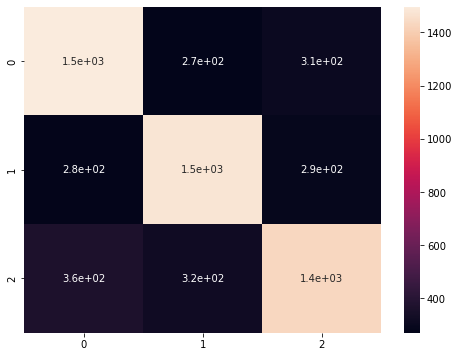

In [55]:
#confusion matrix
corr_matrix = confusion_matrix(y_test, prediction)

#plotting
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True);

### Feature Importance

In [56]:
importances = model.feature_importances_

In [57]:
imp = pd.DataFrame(index=categorical_features)
imp['Importance'] = importances

In [58]:
imp

,Importance
City,0.13
Sport,0.12
Discipline,0.06
Athlete,0.07
Country,0.21
Gender,0.18
Event,0.04
Medal,0.19


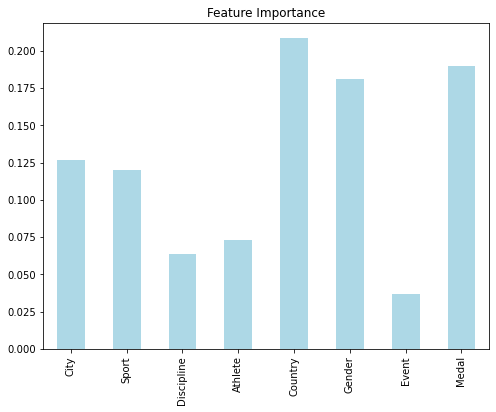

In [59]:
imp.plot.bar(title='Feature Importance',legend=False,color='lightblue',figsize=(8,6));